In [1]:
# Fetch utils directory from GitHub repo (workaround for using the utils in colab)
!curl -sL https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/archive/refs/heads/main.zip -o repo.zip
!unzip -q repo.zip "nextgen25-mlai-workshop01-main/utils/*" -d .
!rm -rf ./utils
!mv nextgen25-mlai-workshop01-main/utils ./utils -f
!rm -rf nextgen25-mlai-workshop01-main repo.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


<h1>
    🤖 MLAI Workshop #01
</h1>

Welcome to the NextGen 2025 Machine Learning and Artificial Intelligence (MLAI) Workshop Series! Across many machine learning courses and tutorial I've found the focus is often on how to use a specific architecture, implement a certain model, or design a pipeline - and that's useful! But I find its much less common for those resources to step back and ask:
- What is does a model represent?
- What does it mean to learn from data?
- Why does this work — and when does it fail?

The goal of this series of workshops isn’t just to show you how to use machine learning models - it's to explore these questions - to facilitate develop a deeper understanding of the fundamentals that underpin how and why machine learning works. To achieve this, we'll take a step back from specific tools of libraries and instead focus on core concepts such as functions, hypothesis spaces, data, optimization, and generalization.

💬 *Question for the audience! Who here works with machine learning regularly? Who here focuses on the theory behind it?*

<h2>
    🗓️ Agenda
</h2>

1. **What are functions?** Understanding functions as the backbone of machine learning — mappings from input to output, and how they describe the world.
2. **How do we represent functions?** Introduction to hypothesis spaces, parameterized models, and the role of structure and flexibility in modeling - work through some example to demonstrate these ideas.

🧃 *Break*

3. **How do we calibrate functions?** Exploring data-driven learning through visualization of loss functions, optimization, and searching for good approximations of the target function.

🧃 *Break*

3. **How useful is this function?** Generalization, approximation vs. estimation, and how our choices impact model performance on seen and unseen data.
4. **Modeling in practice** Put this theory into practice through a group activity.

---

<h2>
    Section 1: Functions
</h2>

<h3>
    📈 Section 1A: What are functions and why should I care?
</h3>

Functions describe the world. Functions allow us to express relationships between objects and are critical in virtually every scientific, engineering, and data-driven domain. From physical phenomena such as the dynamics of protein folding and the behavior of fluids, to abstract processes like decision-making and natural language understanding - functions describe the world.

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GraphCast_Forecast.jpg" height="400"/>
    <p><em>Figure 1. GraphCast is a Google DeepModel model for faster and more accurate global weather forecasting.</em></p>
</div>

So what is a function? Generally put, a function $f$ is an object that maps an input space $\mathcal{X}$ to an output space $\mathcal{Y}$:

\begin{align*}
f: \mathcal{X} \to \mathcal{Y} \tag{1.1}\\
\end{align*}

For example, the linear equation $f(x) = \theta_{1} x + \theta_{2}$ is a function that maps a given input $x \in \mathbb{R}$ to an output $y \in \mathbb{R}$.

In [2]:
# define some function
def f(x):
    return -7.13 * x + 0.51

# map the input to the output
x = 1.5
y = f(x)

print(f"f: {x:.2f} -> {y:.2f}")

f: 1.50 -> -10.19


More generally we can think nearly any process as a function. For example, we might imagine the birth and evolution of a hurricane, when and where the hurricane forms is going to depend on how the atmosphere evolves over time, this in turn depends on an unimagingable amount of factors. Whilst this is much more complex than a linear equation, at the risk of being reductionist, we can nonetheless consider it a function:

\begin{align*}
    f^{*}: \mathcal{X}^{*} \to \mathcal{Y}^{*} \tag{1.2} \\
\end{align*}

where:
- $f^{*}$ represents the target function describing this relationship. (this may be a space of functions $\mathcal{T}$)
- $\mathcal{X}^{*}$ represents the true current and/or historical atmospheric state.
- $\mathcal{Y}^{*}$ represents the true corresponding future atmospheric state.

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GraphCast_Rollout.jpg" height="400"/>
    <p><em>Figure 2. GraphCast takes as input the current atmospheric state and predicts the next state, this can be rolled out in an auto-regressive manner.</em></p>
</div>

This function $f^{*}$ encapsulates all the physics of the system — from large-scale fluid dynamics to fine-grained thermodynamics, the impact of incident rays from the sun, the graviational effects of the moon, and even down to quantum-scale effects, - it reflects the true data generating process. While we oft cannot write down or compute $f^{*}$ directly, we assume it exists and is responsible for generating the weather patterns we observe. 

It's also important to note that $\mathcal{X}^{*}$ and $\mathcal{Y}^{*}$ represent the true states - this is typically different from the values we measure or observe.

In [3]:
def f(x):
    y = ... # <-- some complex function
    return y

x = ... # <-- input
y = f(x) # <-- map input to the output

💬 *Question for the audience! Are any people focused on applying machine learning in their research? What sort of function are they assuming exists and what are the inputs and outputs?*

<h3>
    📌 Section 1B. Can we represent this function?
</h3>

So, there exists some target function $f^{*}$ that describes a process we care about - what next? Unfortunately, in most scenarios we don't have access to $f^{*}$ that describes the data generating process - if we did, we wouldn't be here today talking about machine learning. Instead, we often have to settle for defining some function $f$ that approximates $f^{*}$ well enough that it can be useful within certain scenarios. 

\begin{align*}
    f \approx f^{*} \tag{1.3}\\
\end{align*}

We refer to the set of functions $f$ that approximate $f^{*}$ that meet this criterion as the target space $\mathcal{T}$:

\begin{align*}
    \mathcal{T} = \left\{ f \in \mathcal{H} \,|\, \mathcal{L}(f, f^{*}) \leq \epsilon \text{ and f satisfies additional constraints} \right\} \tag{1.4}
\end{align*}

where:
- $\mathcal{H}$ is the hypothesis space
- $\mathcal{L}(f, f^{*})$ is some function that evaluates the fit of the model
- $\epsilon$ is some evaluation metric threshold

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/GraphCast_Error.png" height="400"/>
    <p><em>Figure 3. GraphCast error distribution on a 12-hour forecast visualized across on mercator projection.</em></p>
</div>

For the example of atmospheric forecasting, you might consider $\mathcal{T}$ as the set of solutions that forecasts to a specified degree of accuracy after a 12-hour rollout. This set of solutions we consider suitable is encapsulated in the choice of $\mathcal{L}(f, f^{*})$ and $\epsilon$. To visualize this idea and the next few cells lets head over to [Miro](https://miro.com/app/board/uXjVI44Nizk=/?share_link_id=794264052796).



<h4>
    🤔 Hypothesis Space
</h4>

The hypothesis space $\mathcal{H}$ defines the set of functions we're willing to consider for $f$, in this sense it represents our hypothesis functions for $f$:

\begin{align*}
    \mathcal{H} = \left\{ f_{\theta}: \mathcal{X} \to \mathcal{Y} \,|\, f_{\theta} \text{ satisfies structural constraints} \right\} \subseteq \Theta \tag{1.5}
\end{align*}

where:
- $f_{\theta}: \mathcal{X} \rightarrow \mathcal{Y}$ represents a single function parameterized by parameters $\theta$
- $f_{\theta} \text{ satisfies structural constraints}$ represents our choice of modeling assumptions e.g. what sort of model we use
- $\Theta$ represents the parameter space

For example, we might have a modelling problem where we hypothesise some linear equation as a suitable solution, in this case we can define $\mathcal{H}$ as:

\begin{align*} 
    \mathcal{H} = \left\{ f_{\theta}: \mathbb{R} \to \mathbb{R} \,|\, f_{\theta}(x) = \theta_{1} x + \theta_{2} \right\}, \quad
    (\theta_{1}, \theta_{2}) \in \mathbb{R}^{2} \tag{1.6}
\end{align*}

In [4]:
# restrict the set of functions to this form
def H(a, b):
    def f(x): # <--- use this form
        return a * x + b
    return f

# pick a specific model from the hypothesis space
f = H(a=0, b=1)

In [5]:
# another structures that is equally valid but not part of our hypothesis
def another_H(a, b):
    def f(x): # <-- 
        return b * x ** 2 + a * x + a * b
    return f

<h4>
    🎛️ Parameter Space
</h4>

The parameter space $\Theta$ is the set of all possible functions arising from different configurations of the parameters $\theta \in \Theta$. 

\begin{align*}
    \Theta = \left\{ \theta \in \mathbb{R}^{p} \,|\, \theta \text{ satisfies model-specific constraints} \right\} \tag{1.7}
\end{align*}

where:
- $p$ is the number of parameters
- $\theta \text{ satisfies model-specific constraints}$ represents additional constraints we place on the space

The highlight the distinction between $\mathcal{H}$ and $\Theta$. There are lots of different functions we could define using a set of $\theta$, this set of functions is usually much larger than our $\mathcal{H}$. For example, we might use $(\theta_{1}, \theta_{2})$ to define a linear function:

\begin{align*} 
    \mathcal{H} = \left\{ f_{\theta}: \mathbb{R} \to \mathbb{R} \,|\, f_{\theta}(x) = \theta_{1} x + \theta_{2} \right\} \tag{1.8}
\end{align*}

But we could also use it to parameterize a logistic curve, even if this is not a part of $\mathcal{H}$:

\begin{align*} 
    \mathcal{H} = \left\{ f_{\theta}: \mathbb{R} \to \mathbb{R} \,|\, f_{\theta}(x) = \frac{1}{1 + \exp^{\theta_{1} (x - \theta_{2})}} \right\} \tag{1.9}
\end{align*}

We could also place constraints on the parameter space to further restrict different parameterizations of functions. For example, we could define specific ranges of parameters for $\theta$ rather than any real number.

\begin{align*} 
    \theta_{1} \in [0, 1], \quad
    \theta_{2} \in \left\{ 1,2 \right\} \tag{1.10}
\end{align*}

In [6]:
# define a set of parameters to consider (doesn't have to be explicit)
a = [0, ..., 1]
b = [1,2]

# define a hypothesis space with parameters constrained by parameter space
def H(a, b):
    assert a >= 0 and a <= 1, "a must be in range [0,1]" # <-- restricts the hypothesis space
    assert b in [1,2], "b must be in {1,2}"
    def f(x): # <--- use this form
        return a * x + b
    return f

# invalid model based on parameter space constraints
f = H(4.1,1)

AssertionError: a must be in range [0,1]

<h4>
    🧠 What does this all mean for our function?
</h4>

When defining our function $f$ that approximates the target function $f^{*}$. The hypothesis space $\mathcal{H}$ and parameter space $\Theta$ allow us to describe the structure and parameterization of our function $f$. In rare circumstances, we may be able have a strong set of prior knowledge we can use to design $\mathcal{H}$. 

Consider the weather forecasting example: Numerical Weather Prediction (NWP) models are based on physical equations such as the Navier–Stokes equations. However, they also rely on parameterized sub-models to approximate unresolved phenomena (e.g., cloud formation, turbulence) - this represents an abstraction on the things we can't model or don't understand:

\begin{align*}
    \mathcal{u}_{t+\Delta t} := \mathcal{u}_t + \Delta t \left[\underbrace{\mathcal{N}(\mathbf{u}, p, \rho)}_{\text{Navier–Stokes dynamics}} + \underbrace{\mathbf{P}_\theta(\lambda, \dots)}_{\text{Subgrid parameterizations}} \right] \tag{1.11}
\end{align*}

In this case:
- The structre of $f$ is mostly well-defined by prior knowledge and restricts $\mathcal{H}$.
- The parameters $\theta$ are learned from empirical evidence, often through historical weather data or assimilation systems.

💬 *Question for the audience! In your domain or problem do you have a well-known form for your function? Do you make simplified assumptions that limit your model - if so, what are they?*

However, for a vast number of problems, we don't even know what form the function should take...
- What function describes a person’s reasoning process? 
- What function maps pixels in an image to its semantic meaning? 
- What function generates coherent video from a text prompt? 

In such scenarios, we cannot rely on prior knowledge to explicitly define or constrain the hypothesis space $\mathcal{H}$. The structure of $f^{*}$ is unknown — and likely inexpressible in closed-form. Instead, we turn to flexible, expressive models capable of approximating a wide range of functions. This is the motivator for architectures such as neural networks which we'll begin to explore in the next workshop.

<div align="center">
    <img src="https://github.com/nextgenerationgraduatesprogram/nextgen25-mlai-workshop01/raw/main/media/notebook/Reasoning.png" height="400"/>
    <p><em>Figure 3. What is the function for someones reasoning process?</em></p>
</div>

With this context we should discuss a fundamental source of error in machine learning, approximation error $\epsilon_{approx}$. Approximation error represents the error between the best function we can express in the hypothesis space $f^{*}_{\mathcal{H}}$ and the target function $f^{*}$:

\begin{align*}
    f^{*}_{\mathcal{H}} = argmin_{f \in \mathcal{H}}\mathcal{L}(f,f^{*}) \tag{1.12}
\end{align*}

Thus, we want to design $\mathcal{H}$ such that it can express $f^{*}$ as closely as possible, ideally $\mathcal{H} \subseteq \mathcal{T}$.

---

<h2>
    📉 Section 2. How do we select the best parameters?
</h2>

So to summarize where we're at. 
1. We have some function $f^{*}$ we want to approximate.
2. We have a set of functions $f_{\theta} \in \mathcal{H}$ we hypothesize may be suitable solutions which are parameterized by $\theta \in \Theta$.

Our next question is how do we select a parameterization $\theta \in \Theta$ and then determine whether this is suitable.

<h3>
    Section 2A. Selecting a model from the hypothesis space.
</h3>

For example, we have some target function $f^{*}$ that represents a data generating process, it is defined as:

\begin{align*}
    f^*(x) = e^{-x^{2}} \cdot \sin(2 \pi \tau x + \varphi), \quad \text{for } x \in [0, 1] \tag{2.1}
\end{align*}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'f(x)')

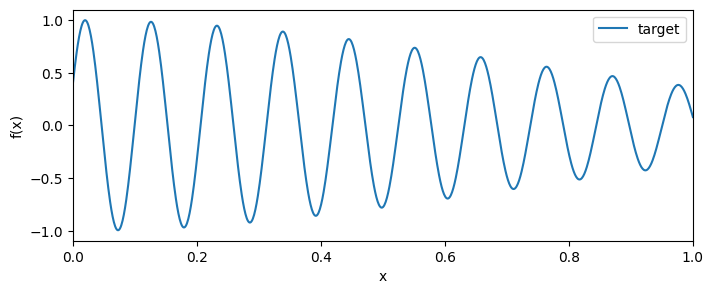

In [10]:
# target function
def f_target(x):
    return np.exp(-x**2) * np.sin(2 * np.pi * 9.4 * x + 0.41)

# suppose we can observe the target function perfectly (not just evaluate it)
N = 1000
x = np.linspace(0, 1, num=N)
y = f_target(x)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x, y, label="target")
ax.set_xlim(x.min(), x.max())
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

Let's define a hypothesis space (the structure) of our function and select a single function from this space using a specific set of parameters.

Text(0, 0.5, 'f(x)')

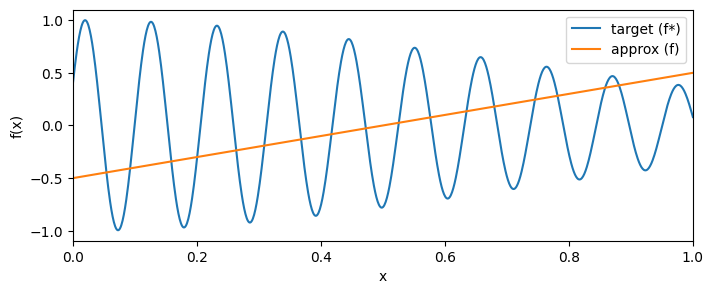

In [11]:
# hypothesis space
def H(tau, phi):
    def f(x):
        return tau * x + phi # <-- TODO: this is probably a poor hypothesis - have a go at re-writing it
    return f

# select a function from this space
f_approx = H(tau=1, phi=-0.5) # <-- TODO: these is probably a poor parameterization - pick some better parameters

# make predictions
y_pred = f_approx(x)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x, y, label="target (f*)")
ax.plot(x, y_pred, label="approx (f)")
ax.set_xlim(x.min(), x.max())
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

While in this scenario since we have access to the function it's very easy to select the right hypothesis space and the select a suitable parameterization. Let's put this into a more realistic perspective.

<h3>
    🔍 Section 2B. Observing the Data Generating Processes
</h2>

While we may not known the function $f^{*}$, we can often observe its behaviour. That is, we can collect a set of data $\mathcal{D}$ generated by the processes governing this function - usually in the form of input/output pairs $(\mathcal{X}_{i}, \mathcal{Y}_{i})$:

\begin{align*}
    \mathcal{D} = \left\{ (\mathcal{X}_{i}, \mathcal{Y}_{i}) \right\}_{i=0}^{N} \tag{2.2}
\end{align*}

where:
- $\mathcal{X}_{i}$ represents an observation of the input.
- $\mathcal{Y}_{i}$ represents an observation of the output.

Observing both the input and output sides of a data generating process is rarely clean. In practice, it’s often a messy, uncertain, and biased process — filled with various sources of noise, systematic errors, and missing information. Take the example of atmospheric forecasting. To model the state of the atmosphere, we aggregate measurements from various sources — satellites, weather stations, radiosondes, aircraft, and remote sensors. Each of these introduces its own limitations:

- $\mathcal{X}_i$ represents the observed current or historical atmospheric state, assembled from multiple noisy sensors.
- $\mathcal{Y}_i$ represents the future state we hope to predict — often inferred from models, simulations, or delayed ground-truth verification.

Even with sophisticated tools, observations are rarely complete, consistent, or unbiased. Noise and bias in data don’t just affect accuracy — they shape what kind of function we’re able to learn. Understanding the imperfections in your data is just as important as designing your model.

💬 *Question for the audience! What sort of sources of noise exists in your input data? What about your output pairs - are they measured, simulated, annotated - what sort of sources of noise exist?*

For example, we want to observe a function $f^{*}$, however there might be errors in where we measure and the observerations.

\begin{align*}
    f^*(x) = e^{-x^{2}} \cdot \sin(2 \pi \tau x), \quad \text{for } x \in [0, 1] \tag{2.3}
\end{align*}

In [13]:
# perfect observation process
def observe_perfect(f, x):
    return f(x)

# for refernce
N = 1000
x = np.linspace(0, 1, num=N)
y = observe_perfect(f_target, x)

In [14]:
# noise observation process
def observe_noisy(f, x):
    # we often can't sample perfectly a point in the domain perfectly
    x_noise = np.random.normal(0.15, 0.05, x.shape[0])
    x_measure = x + x_noise

    # we often can't measure the result perfectly
    y_noise = np.random.normal(-0.13, 0.16, x.shape[0])
    y_obs = f(x_measure) + y_noise

    return y_obs

Text(0, 0.5, 'y (observed response)')

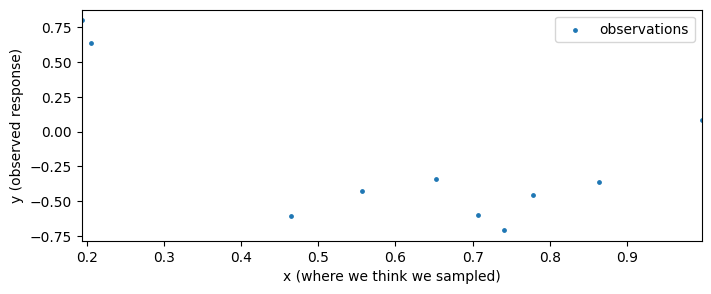

In [15]:
# define a set of points we want to observe the function
x_meas = np.random.rand((10))

# noisily observe the function
y_obs = observe_noisy(f_target, x_meas)

# plot the results
fig, ax = plt.subplots(figsize=(8,3))
# ax.plot(x, y, label="target", alpha=0.25) # <-- feel free to uncomment
ax.scatter(x_meas, y_obs, s=6, label="observations")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")
ax.set_xlabel("x (where we think we sampled)")
ax.set_ylabel("y (observed response)")

Assuming we don’t have access to the true function $f^{*}$, it can be extremely difficult to form a hypothesis about what kind of function might have generated a dataset — especially when the observations are sparse. From a visual standpoint, attempting to fit a curve through a handful of points can lead to wildly different interpretations depending on the assumptions we make. Lets try to sample the dataset more densely and potentially more accurately.

Text(0, 0.5, 'y')

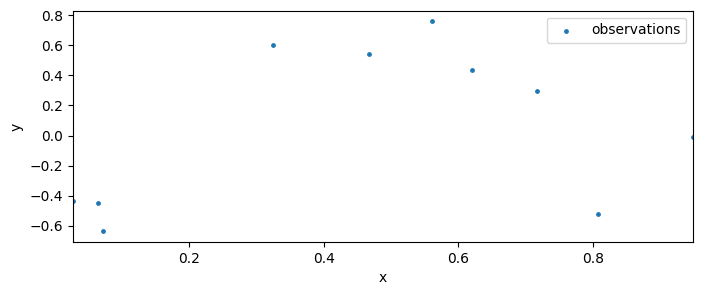

In [16]:
# noise observation process <-- improve this
def observe_noisy(f, x):
    # we often can't sample perfectly a point in the domain perfectly
    x_noise = np.random.normal(0.15, 0.05, x.shape[0])
    x_measure = x + x_noise

    # we often can't measure the result perfectly
    y_noise = np.random.normal(-0.13, 0.16, x.shape[0])
    y_obs = f(x_measure) + y_noise

    return y_obs

# define a set of points we want to observe the function <-- sample more points
x_meas = np.random.rand((10))
y_obs = observe_noisy(f, x_meas)

# plot the results
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="observations")
ax.set_xlim(x_meas.min(), x_meas.max())
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("y")

Each observation provides a constraint on the behaviour of the function $f^{*}$ at a specific point in the input space $\mathcal{X}$, by revealing what output it maps to $\mathcal{Y}$. Collectively the dataset $\mathcal{D}$ constrains the parameters of our model $f_{\theta}$ and can be used to inform our set of hypothesis $\mathcal{H}$.

This forces us to ask whether $\mathcal{D}$ is sufficient to capture and accurately represent the relevant features of $f^{*}$. This discussion on how sufficiently and accurately we resolve the data manifold is a crucial aspect of machine learning - in approximation theory e.g. polynomial interpolation, error bounds of the function approximation often depend on the maximum spacing between samples:

\begin{align*}
    \epsilon \propto \delta^{k} \cdot || f^{(k)} ||_{\infty}, \quad 
    \delta = max_{i}(\mathcal{X}_{i+1} - \mathcal{X}_{i}) \tag{2.4}
\end{align*}

where:
- $\epsilon$ is the error bound
- $f^{(k)}$ is the $k$-th derivative of a function $f$
- $\delta$ is the largest distance between points

Where a functions value changes rapidly (high $f^{(k)}$) to make sure we can constrain our function (minimize $\epsilon$) we need to sample the points more densely around this area of change (minimize $\delta$).

💬 *Question for the audience! Does your dataset accurately resolve your data manifold? How do you determine this when it comes to extremely high-dimensional and abstract data?*

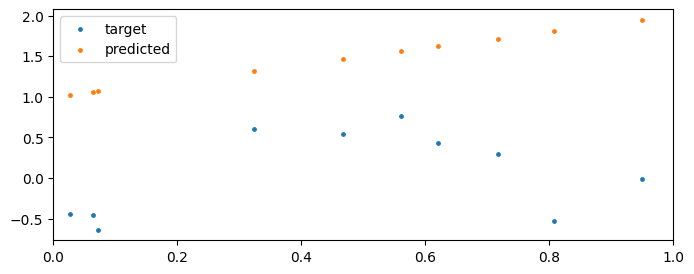

In [17]:
# select a suitable parameterization <-- vary the parameterization
f_approx = H(tau=1, phi=1)

# get our predictions
y_pred = f_approx(x_meas)

# plot the target function
fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x_meas, y_obs, s=6, label="target")
ax.scatter(x_meas, y_pred, s=6, label="predicted")
ax.set_xlim(x.min(), x.max())
ax.legend(loc="best")

As you're going through this manual optimization process it's good to notice that you're relying on your observations $\mathcal{D}$ to constrain $f_{\theta}$ - this is more or less the process of learning - constraining your model using evidence. However, this process of fitting functions by hand isn't a particularly rigorous approach - what does it mean for your parameterization to be a good fit?

<h3>
    🎯 Section 2C. Evaluating the fit of our function
</h3>

During the learning process, we need a way to measure how well our function $f_{\theta}$ performs to guide our parameterization $\theta \in \Theta$. In an ideal world, we would compare our approximation $f$ directly to the target function $f^{*}$ (which we don't have access to):

\begin{align*}
    \mathcal{L}(f_\theta, f^{*}) = ... \tag{2.5}
\end{align*}

However, we do have observations of $f^{*}$ as represented by $\mathcal{D}$. We can instead compare how well our function $f$ evaluated at a point $\mathcal{X}_{i}$ predicts the observations $\mathcal{Y}_{i}$.

\begin{align*}
    \hat{\mathcal{Y}}_i = f_\theta(\mathcal{X}_i) \tag{2.6}
\end{align*}

By comparing $\hat{\mathcal{Y}}_i$ with the observations $\mathcal{Y}_{i}$ we can compute an empirical approximation of the true error as defined by the observations:

\begin{align*}
    \mathcal{L}(\mathcal{D}, f_\theta) = \frac{1}{n} \sum_{i=1}^{n} \ell\left(f_\theta(x_i), y_i\right) \tag{2.7}
\end{align*}

where:
- $\ell(\cdot, \cdot)$ is a pointwise loss function, such as the mean squared error $(\hat{\mathcal{Y}}_i - \mathcal{Y}_{i})^{2}$
- $\mathcal{L}$ is the average loss over the dataset $\mathcal{D}$.

This loss value $\mathcal{L}$ provides feedback about how good our parameterization $f_{\theta}$ is, based on the evidence $\mathcal{D}$. There are numerous ways to define the pointwise loss function $\ell$, each reflecting different assumptions, goals, or properties of the task and this also has implications for the learning process as we'll see. Lets see how we could implement an example below:

💬 *Question for the audience! What loss functions have you used before? Have you used a different loss function and seen a significant difference in model behaviour?*

In [19]:
# lets define a pointwise loss function
def pointwise_mse_loss(y, y_hat):
    """
    mean squared error (MSE)
    """
    return (y_hat - y) ** 2

# lets define a function that computes the average loss across a dataset
def compute_dataset_loss(f, x, y, loss_fn):
    # compute predictions
    y_hat = f(x)

    # number of samples
    N = y.shape[0]

    # accumulate loss across samples
    L = 0
    for i in range(N):
        L += loss_fn(y[i], y_hat[i])

    # compute average loss
    L = (1/N) * L

    return float(L)

# lets compute the average mse loss across the dataset for our function
L_D = compute_dataset_loss(f, x_meas, y_obs, pointwise_mse_loss)
print(f"L_D = {L_D:.3f}")

L_D = 0.371


Let's have a go at another loss and evaluate it on the dataset.

In [20]:
def your_pointwise_loss(y, y_hat):
    ... # <-- your loss here
    return 1.0


L_D = compute_dataset_loss(f, x_meas, y_obs, your_pointwise_loss)
print(f"L_D = {L_D:.3f}")

L_D = 1.000


<h3>🏞️ Section 2D. The Loss Landscape</h3>

As a result of not being able to use $f^{*}$ directly we had to rely on a dataset $\mathcal{D}$ to evaluate our function $f_{\theta}$ - hence we can consider our loss as a function of the dataset $\mathcal{D}$ and parameters $\theta$, with some profound consequences. Different datasets and loss functions define different loss functions: i.e. surfaces over parameter space that determine how good each model is. These landscapes, in turn, define which models are viable.

Formally, we define the empirical-risk minimiser $\hat{f}$ as the function in our hypothesis space $\mathcal{H}$ that best fits the training data $\mathcal{D}$:

\begin{align*}
    \hat{f} = argmin_{f_{\theta} \in \mathcal{H}} \mathcal{L}(\mathcal{D}, f_\theta) \tag{2.8}
\end{align*}

This leads to another fundamental source of error in machine learning, the generalization error, $\epsilon_{gen}$. The generalization error represents the error between $\hat{f}$ and $f^{*}$, in essense the error as a result of the dataset constraining how well we can learn our function.

We can explore how our loss, defined by $\mathcal{L}(\mathcal{D}, f_\theta)$, varies as we modify the parameters $\theta$ of our funtion.

Text(0.5, 1.0, 'Loss Landscape')

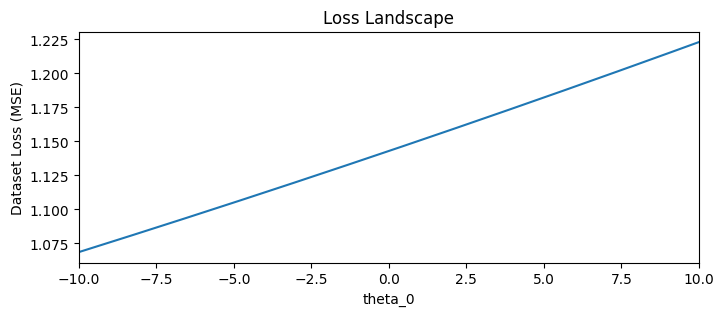

In [ ]:
# lets consider a single parameter
theta_0 = np.linspace(-10, 10, num=1000)

# lets compute the loss (error across the dataset) for each function defined by the parameter
losses = np.zeros_like(theta_0)
for i in range(theta_0.shape[0]):
    # select a function from the hypothesis space
    f_approx = H(tau=theta_0[i], phi=1)

    # perform predictions based on dataset
    y_pred = f_approx(x_meas)

    # compute loss across dataset
    losses[i] = compute_dataset_loss(f_approx, x, y_obs, pointwise_mse_loss)


# lets plot the result
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(theta_0, losses)
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_xlabel("theta_0")
ax.set_ylabel("Dataset Loss (MSE)")
ax.set_title(f"Loss Landscape")

We can extend this idea to two dimensions and visualize how the loss functions varies as a function of two different parameter values. We can think of this as a slice of the full loss landscape.

In [ ]:
# lets consider a single parameter
theta_0 = np.linspace(-2.5, 2.5, num=100)
theta_1 = np.linspace(-2.5, 2.5, num=100)
T0, T1 = np.meshgrid(theta_0, theta_1, indexing="ij")

# lets compute the loss (error across the dataset) for each function defined by the parameter
losses = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T1.shape[0]):
        # select a function from the hypothesis space
        _f = H(tau=T0[i,j], phi=T1[i,j])

        # compute loss across dataset
        losses[i,j] = compute_dataset_loss(_f, x_meas, y_obs, pointwise_mse_loss)
        

# lets plot the result
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
s = ax.plot_surface(T0, T1, losses, cmap='viridis')
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_ylim(theta_1.min(), theta_1.max())
ax.set_xlabel("theta_0 (tau)")
ax.set_ylabel("theta_1 (phi)")
ax.set_zlabel("Dataset Loss (MSE)")
ax.set_title(f"Loss Landscape")

# as a contour plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_ylim(theta_1.min(), theta_1.max())
ax.set_xlabel("theta_0 (tau)")
ax.set_ylabel("theta_1 (phi)")
ax.set_title(f"Loss Landscape (Top-down View)")

We can view our function as being at a specific point in this space defined:

In [ ]:
# as a contour plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(theta_0.min(), theta_0.max())
ax.set_ylim(theta_1.min(), theta_1.max())
ax.set_xlabel("theta_0 (tau)")
ax.set_ylabel("theta_1 (phi)")
ax.set_title(f"Loss Landscape (Top-down View)")

# plot our function in parameter space
tau, phi = -1.4, 1.9
f = H(tau, phi)
ax.scatter(tau, phi, s=64, marker="x", color="red")

We can't easily visualise spaces with more than three dimensions, but the idea of a loss landscape is still a powerful way to think about learning. This landscape is a geometric surface defined by the loss function, where low points (minima) represent good models (low loss) and high points (maxima) represent poor models (high loss). As we change the parameters of our model, we move around on this landscape.

The loss landscape is a geometric object that encodes the structure of the learning problem - linking together the dataset, model, and eventually the optimization procedure. Understanding its shape helps us reason about trainability, sensitivty of the model to initialization, and the nature of solutions.

<h2>
    Section 3. Optimization - The Learning in Machine Learing 
</h2>

In machine learning, once we've chosen a hypothesis $\mathcal{H}$ space and defined a loss function $\mathcal{L}(f_\theta(x), \mathcal{D})$, we need a way to find the best parameters we can $\theta \in \Theta$ that make our predictions $f_\theta(x)$ as close as possible to the true outputs $y$ in the dataset - i.e. minimize that loss. This is essentially an optimization problem where we're aiming to explore the $\mathcal{H}$ - as we've seen we can view this is varying $\theta$ to minimize $\mathcal{L}(f_\theta(x), \mathcal{D})$:

\begin{align*}
\theta^* = \arg\min_\theta \mathcal{L}(f_\theta(x), y) \tag{3.1}
\end{align*}

While there are lots of different techniques to perform optimization such as evolutionary algorithms, we've been building up the reasoning towards using another algoritmh - called gradient descent.

<h3>Section 3A. Gradient Descent</h3>

Gradient descent is one of the most widely used optimization algorithms in machine learning. It’s an iterative method that updates model parameters in the direction that most rapidly decreases the loss. You can imagine the loss surface as a 3D landscape with hills, valleys, and a lowest point — the global minimum. Gradient descent uses the gradient (a vector indicating the slope of the loss surface at a point) to determine the direction of steepest descent, and takes a step in that direction.

\begin{align*}
\theta := \theta - \eta \cdot \nabla_\theta \mathcal{L}(f_\theta(x), y) \tag{3.2}
\end{align*}

where:
- $\nabla_\theta \mathcal{L}$ is the gradient of the loss w.r.t. parameters.
- $\eta$ is the learning rate - the size of our step.

When the loss function is convex — such as in linear regression with mean squared error — gradient descent is guaranteed to find the global minimum. For non-convex loss surfaces, like those arising in deep neural networks, it may converge to a local minimum or saddle point. However, in practice, gradient descent often still finds solutions that generalize well.

Gradient descent forms the computational backbone of most modern machine learning algorithms, from simple linear models to large-scale deep learning systems.

So how do we compute and apply the gradient? Enter calculus.

So how do we compute the gradient of the loss landscape $\nabla_\theta \mathcal{L}$ with respect to $\theta$?

We are minimizing the **mean squared error (MSE)** loss:

\begin{align*}
\mathcal{L}(\tau, \varphi) = \frac{1}{n} \sum_{i=1}^{n} \left( f_\theta(x_i) - y_i \right)^2 \tag{3.2}
\end{align*}

Where the model (our hypothesis function) is:

\begin{align*}
f_\theta(x) = e^{-x^2} \cdot \sin(2\pi \tau x + \varphi) \tag{3.3}
\end{align*}

Our goal is to compute:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \tau} \quad \text{and} \quad \frac{\partial \mathcal{L}}{\partial \varphi} \tag{3.4}
\end{align*}

Let’s define the output of the model for a single input, then the loss becomes:

\begin{align*}
\mathcal{L} = \frac{1}{n} \sum (f_\theta(x_i) - y_i)^2 \tag{3.5}
\end{align*}

The chain rule allows us to decompose the loss derivative into the product of:
- The derivative of the loss with respect to the model output (error),
- And the derivative of the model output with respect to the parameter.

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \tau} 
= \frac{\partial \mathcal{L}}{\partial f_\theta(x_i)} \cdot \frac{\partial f_\theta(x_i)}{\partial \tau} 
= \frac{1}{n} \sum 2(f_\theta(x_i) - y_i) \cdot \frac{\partial f_\theta(x_i)}{\partial \tau} \tag{3.6}
\end{align*}

Now differentiate the model function with respect to $\tau$:

\begin{align*}
\frac{\partial f_\theta(x_i)}{\partial \tau}
= \frac{d}{d\tau} \left[ e^{-x_i^2} \cdot \sin(2\pi \tau x_i + \varphi) \right]
= e^{-x_i^2} \cdot \cos(2\pi \tau x_i + \varphi) \cdot 2\pi x_i \tag{3.7}
\end{align*}

Putting it all together:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \tau}
= \frac{2}{n} \sum (f_\theta(x_i) - y_i) \cdot e^{-x_i^2} \cdot \cos(2\pi \tau x_i + \varphi) \cdot 2\pi x_i \tag{3.8}
\end{align*}

...Follow the same process for $\varphi$...



This lets us efficiently compute how changes in parameters influence the overall loss, and is the mechanism used in frameworks like PyTorch and TensorFlow during automatic differentiation.

In [ ]:
# we can compute the derivatives of our function
def df_dtau(x, tau, phi):
    return 2 * np.pi * x * np.exp(-x**2) * np.cos(2 * np.pi * tau * x + phi)

def df_dphi(x, tau, phi):
    return np.exp(-x**2) * np.cos(2 * np.pi * tau * x + phi)


# and compute the derivative of the loss wrt to our function
def grad_mse_tau_phi(x, y, tau, phi):
    y_pred = H(tau, phi)(x)
    error = y_pred - y

    dL_dtau = 2 * np.mean(error * df_dtau(x, tau, phi))
    dL_dphi = 2 * np.mean(error * df_dphi(x, tau, phi))

    return dL_dtau, dL_dphi

In [ ]:
# lets setup a grid of parameters
theta_0 = np.linspace(-2.5, 2.5, num=100)  # tau
theta_1 = np.linspace(-2.5, 2.5, num=100)  # phi
T0, T1 = np.meshgrid(theta_0, theta_1, indexing="ij")

# lets compute the loss at each point of the grid (for visualization)
losses = np.zeros_like(T0)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        _f = H(tau=T0[i, j], phi=T1[i, j])
        losses[i, j] = compute_dataset_loss(_f, x_meas, y_obs, pointwise_mse_loss)

# 1. define the parameter values
tau, phi = 0.2, 1.9

# 2. compute the gradient of the loss with respect to each parameter - \nalba_{theta}
dL_dtau, dL_dphi = grad_mse_tau_phi(x_meas, y_obs, tau, phi)

# 3.  scale the gradient by a step size
lr = 1.00
dL_dtau = lr * dL_dtau
dL_dphi = lr * dL_dphi

# plot contour and gradient vector
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(T0.min(), T0.max())
ax.set_ylim(T1.min(), T1.max())
ax.set_xlabel("tau")
ax.set_ylabel("phi")
ax.set_title("Loss Landscape with Gradient Vector")
ax.quiver(tau, phi, dL_dtau, dL_dphi, angles='xy', scale_units='xy', scale=1, color='red', width=0.01)
ax.plot(tau, phi, 'ro', label="Start Point")
ax.legend()

In [ ]:
def gradient_descent_traj(tau_init, phi_init, x, y, lr, steps):
    tau, phi = tau_init, phi_init
    history = []

    for _ in range(steps):
        # define model and compute error
        model = H(tau, phi)
        y_pred = model(x)
        error = y_pred - y

        # compute gradients using known partial derivatives
        grad_tau = 2 * np.mean(error * df_dtau(x, tau, phi))
        grad_phi = 2 * np.mean(error * df_dphi(x, tau, phi))

        # store history before update
        loss = np.mean((y - y_pred)**2)
        history.append((tau, phi, loss))

        # gradient descent update
        tau -= lr * grad_tau
        phi -= lr * grad_phi

    return np.array(history)

# Run gradient descent
trajectory = gradient_descent_traj(tau_init=1.0, phi_init=0.0, x=x_meas, y=y_obs, lr=0.1, steps=50)

# Plot loss over iterations
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(trajectory[:, 2], label="Loss over Iterations")
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss (MSE)")
ax.set_title("Loss Curve")
ax.grid(True)
ax.legend()

# Plot the path on the loss landscape
fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(T0, T1, losses, levels=50, cmap='viridis')
ax.set_xlim(T0.min(), T0.max())
ax.set_ylim(T1.min(), T1.max())
ax.set_xlabel("tau")
ax.set_ylabel("phi")
ax.set_title("Gradient Descent Path on Loss Landscape")

# Path
ax.plot(trajectory[0, 0], trajectory[0, 1], 'rx', label="Initial Point")
ax.plot(trajectory[:, 0], trajectory[:, 1], 'r-', alpha=0.25, label="Gradient Descent Path")
ax.plot(trajectory[-1, 0], trajectory[-1, 1], 'ro', label="Final Point")
ax.legend()

In [ ]:
final_tau, final_phi = tuple(trajectory[-1,:2].tolist())
final_tau, final_phi

We refer to the model with the set of parameters determined by the optimization process as $\tilde{f}$.

This leads to another fundamental source of error in machine learning, the optimization error, $\epsilon_{opt}$. The optimization error error represents the error between $\hat{f}$ (best possible model your hypothesis space could express based on the data) and $\tilde{f}$ (the model your optimization algorithm actually found), in essense the error as a result of the imperfect optimization process. Even when the hypothesis space $\mathcal{H}$ is expressive enough to represent a good approximation of the true function, you may not reach that optimum during training. This happens due to:
- Poor initialization: Your starting point in parameter space may be far from the optimum.
- Learning rate issues: If your learning rate is too high, you may overshoot the minimum. If too low, training may stagnate.
- Early stopping: Optimization may be halted before convergence due to computational limits or regularization strategies.
- Local minima or saddle points: In non-convex landscapes, the optimizer may get trapped in regions that are suboptimal.
- Noisy or stochastic gradients: In mini-batch training, variance in gradient estimates can lead to imperfect updates.


---

<h2>🧠 Workshop Summary: What Have We Learned?</h2>

Over the course of this workshop, we’ve taken a step back from just "using machine learning models" and instead focused on building a deeper understanding of how learning works — and why. Whilst this first workshop was very theory heavy - we're going to revisit and reinforce some of these concepts throughout the next set of workshops - hopefully this provides some good intuition for the future.


<h3>🔁 1. Machine Learning is About Learning Functions</h3>

We reframed machine learning as the task of approximate an unknown function $f^*$ that maps inputs to outputs:
\begin{align*}
    f^*: \mathcal{X} \rightarrow \mathcal{Y}
\end{align*}

Since we rarely know $f^*$ directly, we observe data $\mathcal{D}$ — noisy samples of its behavior — and attempt to learn an approximation $f_\theta$ that generalizes well.

<h3>📐 2. We Define a Hypothesis Space</h3>

We choose a hypothesis space $\mathcal{H}$: the family of functions we’re willing to consider. This reflects our assumptions and modeling choices — linear functions, neural nets, polynomials, etc.


<h3>🎯 3. We Use Data to Constrain the Model</h3>

Each observation in $\mathcal{D}$ acts as a constraint on what $f^*$ might be. The dataset, function, and loss function defines a surface over parameter space, and training means searching this surface for a good minimum.

\begin{align*}
    \mathcal{L}(\theta) = \frac{1}{n} \sum \mathcal{L}(f_\theta(x_i), y_i)
\end{align*}

<h3>🔽 4. We Minimize Loss via Optimization</h3>

We explored gradient descent as a method to minimize the loss. We visualized how the landscape behaves, how gradients flow, and how descent leads to improvement — but not always perfection.

<h3>❗ 5. We Encounter Fundamental Errors</h3>

We introduced three core sources of error in machine learning:
- Approximation error: our model can’t express the true function.
- Optimization error: our optimizer didn’t find the best possible model.
- Generalization error: we didn’t see enough data to make a reliable estimate.

<h3>🧭 Final Takeaway</h3>

> **Machine learning isn’t just about tools or code — it’s about assumptions, constraints, and learning from evidence.**

Everything we do — from choosing a model to training and evaluation — reflects this mindset:  
We are learning a function, from data, under uncertainty.

---